In [2]:
import numpyro
numpyro.set_host_device_count(4)
import bsts
import yfinance as yf # pip install yfinance
import matplotlib.pyplot as plt
plt.rcParams['patch.facecolor'] = 'white'
plt.style.use('ggplot')
%matplotlib inline

In [3]:
tickers = yf.Tickers('BP CVX XOM ^GSPC ^IXIC')
df = tickers.history(start='2009-01-01', end='2012-01-01')['Close']
df.head()

[*********************100%***********************]  5 of 5 completed


,BP,CVX,XOM,^GSPC,^IXIC
Date,,,,,
2009-01-02,23.477785,45.176231,49.833115,931.799988,1632.209961
2009-01-05,23.758835,45.258896,49.827026,927.450012,1628.030029
2009-01-06,23.768530,45.666264,49.015205,934.700012,1652.380005
2009-01-07,22.998045,43.664852,47.763866,906.650024,1599.060059
2009-01-08,23.652231,43.830177,48.276600,909.729980,1617.010010


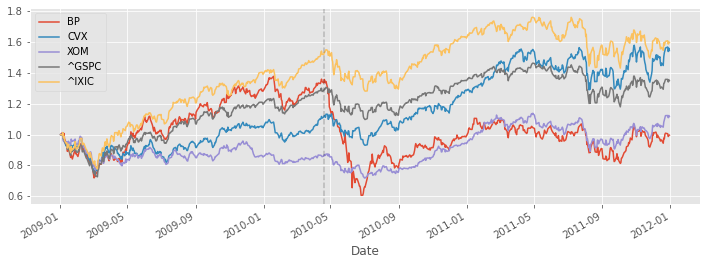

In [4]:
spill_date = '2010-04-20'
fig, ax = plt.subplots(figsize=(12, 4))
df.div(df.iloc[0, :], axis=1).plot(ax=ax)
ax.axvline(spill_date, color='black', linestyle='--', alpha=0.2)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

(<Figure size 864x1008 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Time series'}>,
        <AxesSubplot:title={'center':'Trend'}>,
        <AxesSubplot:title={'center':'Change in trend'}>], dtype=object))

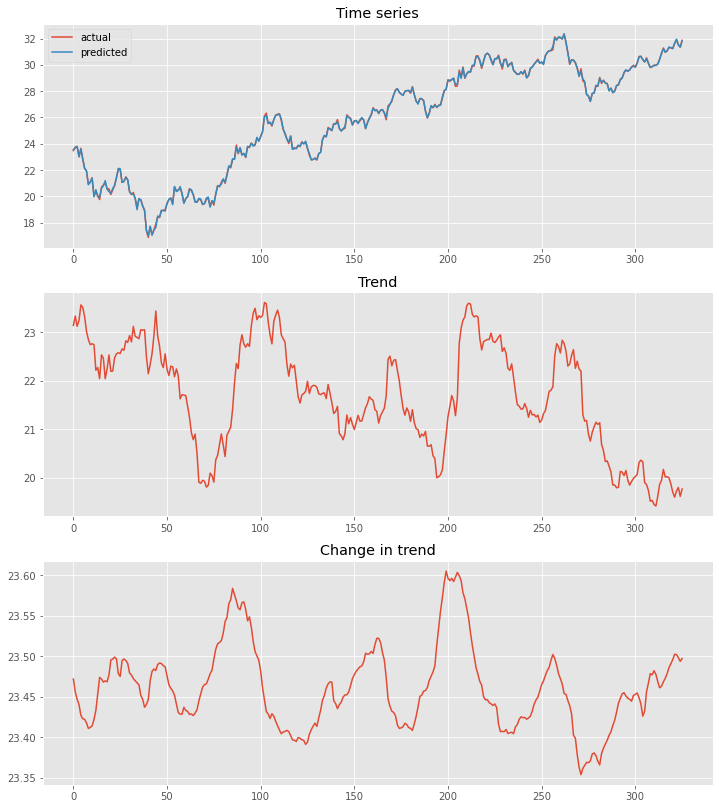

In [5]:
y_train = df.loc[:spill_date, 'BP'].values
X_train = df.loc[:spill_date].drop('BP', axis=1).values

model = bsts.BSTS(seasonality=None)
model.fit(y_train, X_train)
model.plot()

array([<AxesSubplot:title={'center':'Original'}>,
       <AxesSubplot:title={'center':'Pointwise'}>,
       <AxesSubplot:title={'center':'Cumulative'}>], dtype=object)

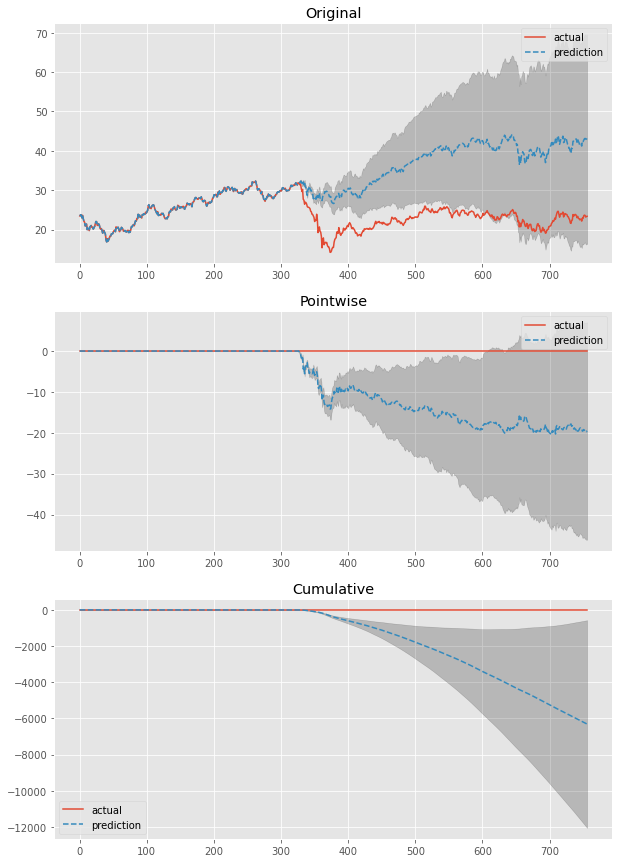

In [6]:
y_test = df.loc[spill_date:, 'BP'].values
X_test = df.loc[spill_date:].drop('BP', axis=1).values

model.plot_impact(y_test, X_test)